In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# TASK 1

# 1. source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# 2. make data machine readable
df = pd.read_csv('processedWithHeader.cleveland.data', na_values='?')
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  goal  
0    3.0  0.0   6.0     0  
1    2.0  3.0   3.0     2  
2    2.0  2.0   7.0     1  
3    3.0  0.0   3.0     0  
4    1.0  0.0   3.0     0  


In [289]:
# 3. size and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  goal      303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [290]:
# 4. clean data
df.isna().sum() # check for missing data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
goal        0
dtype: int64

In [291]:
df = df.dropna() # drop missing data
df = df.drop_duplicates() 
df = df.astype({'ca': 'int', 'thal': 'int'}) # cahnge the Dtype on ca and thal to ints

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  goal      297 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 34.8 KB
None
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0 

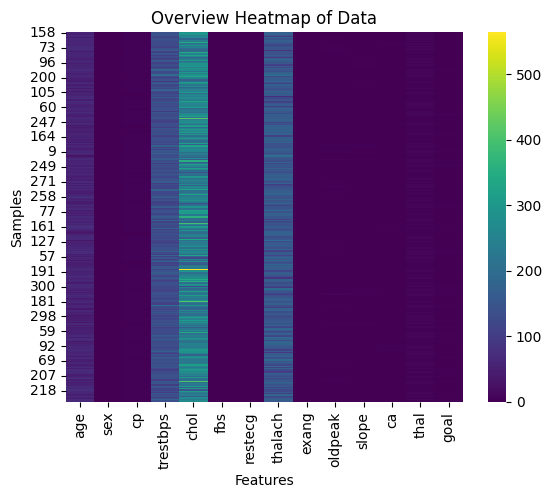

In [292]:
# 5. Overview of the data (Heatmap)
sns.heatmap(df.sample(297), cmap='viridis')
plt.title("Overview Heatmap of Data")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

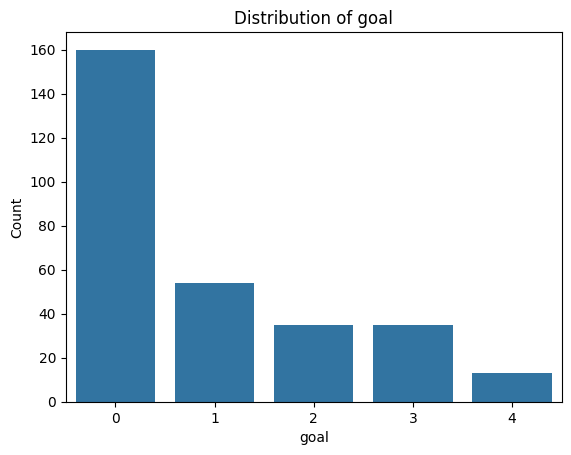

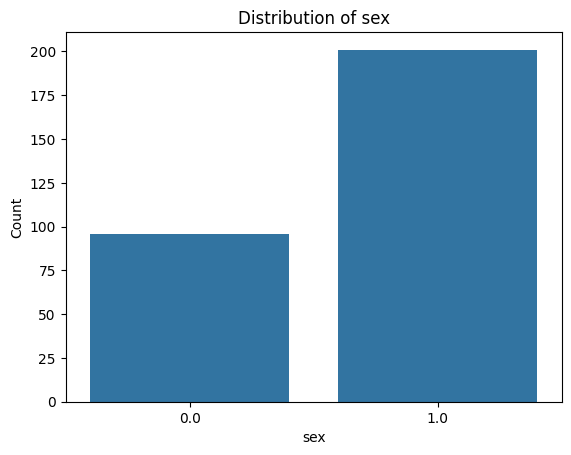

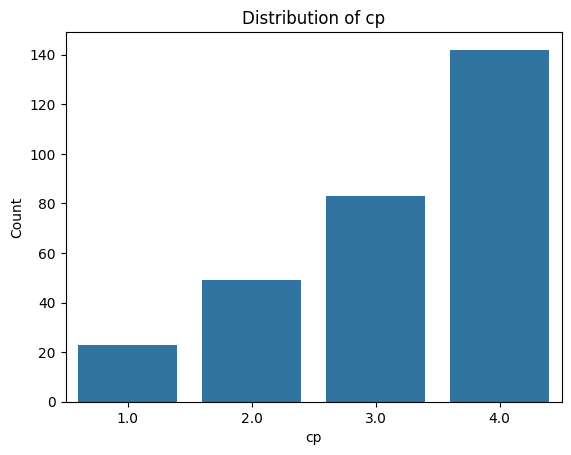

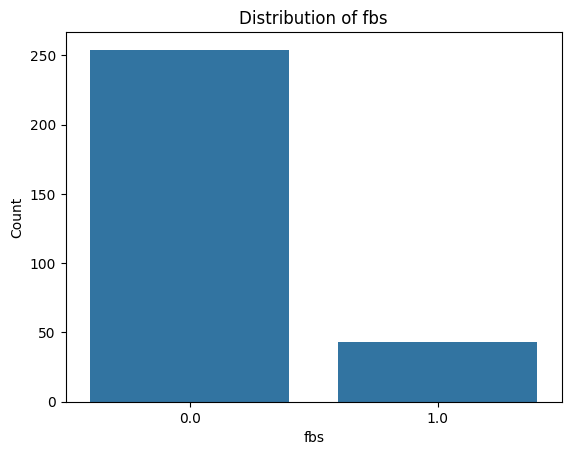

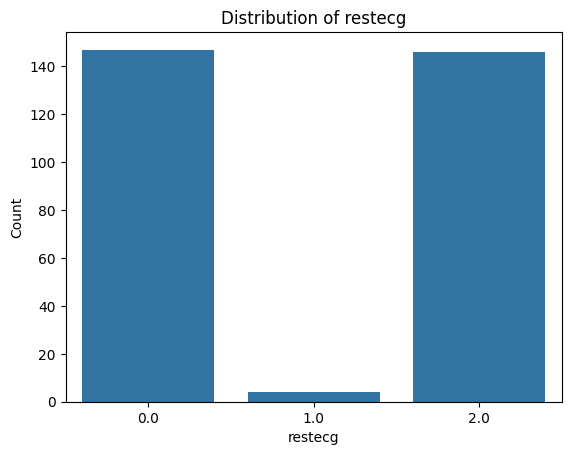

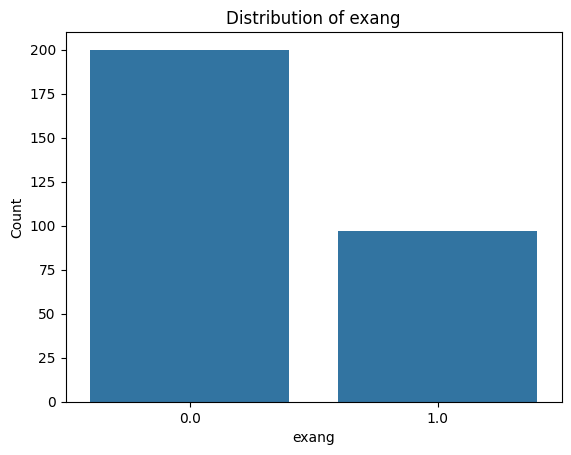

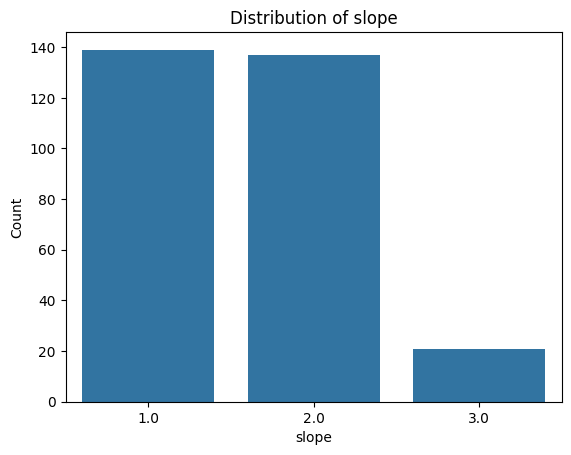

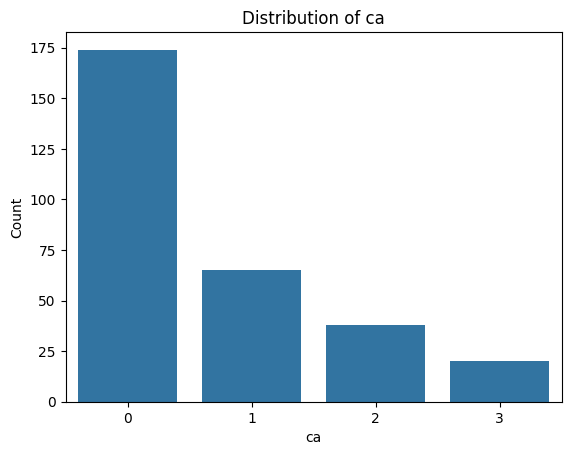

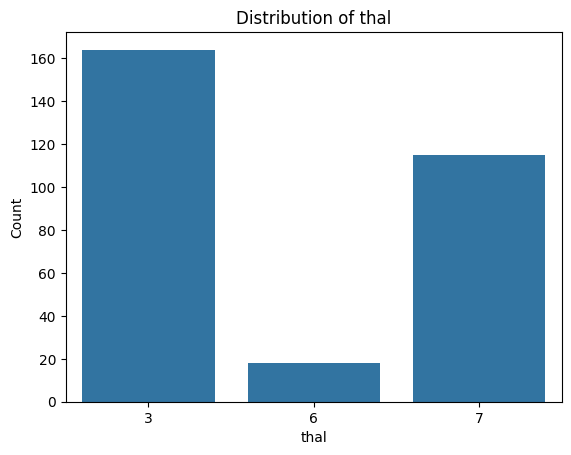

In [293]:
# 6. Understanding single variables - univariate analysis: categorical data
categorical_cols = ['goal', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


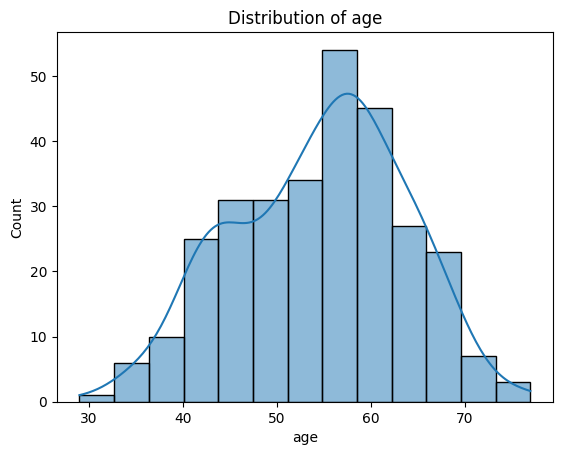

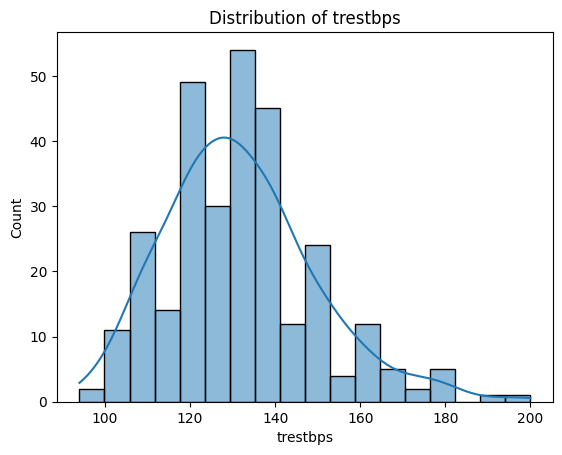

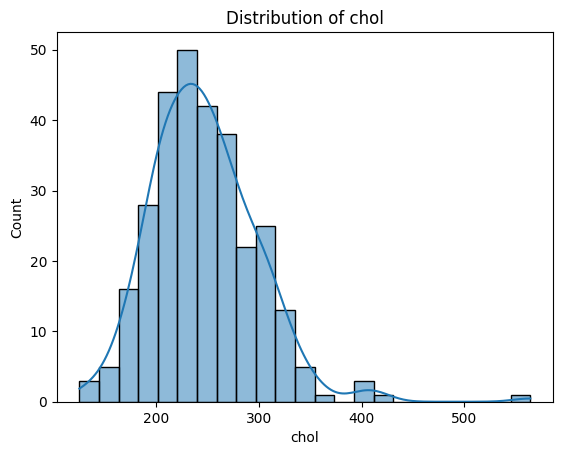

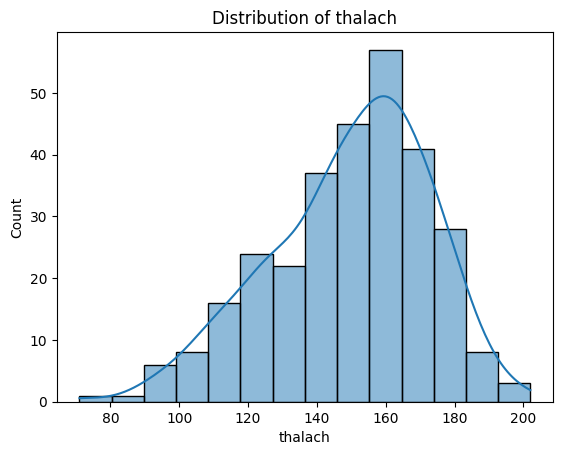

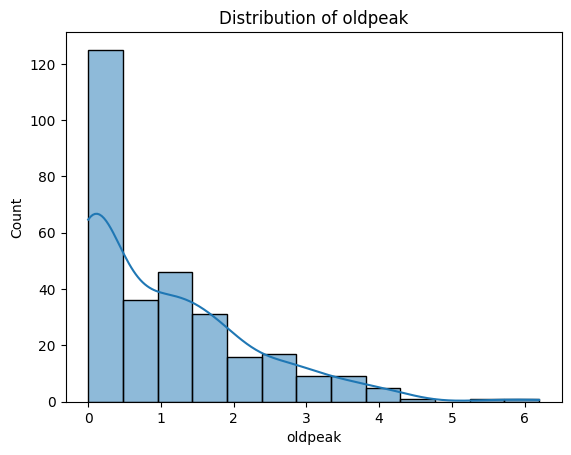

In [294]:
# 6. Understanding single variables - univariate analysis: numerical data
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

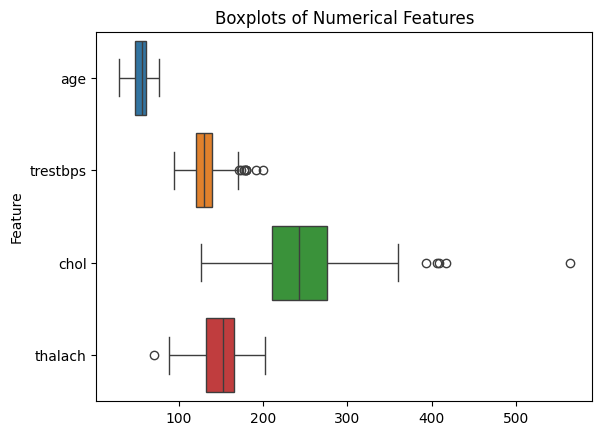

In [295]:
# 6. Further comments for univariate analysis
sns.boxplot(data=df[numerical_cols[0:4]], orient='h')
plt.title("Boxplots of Numerical Features")
plt.ylabel("Feature")
plt.show()

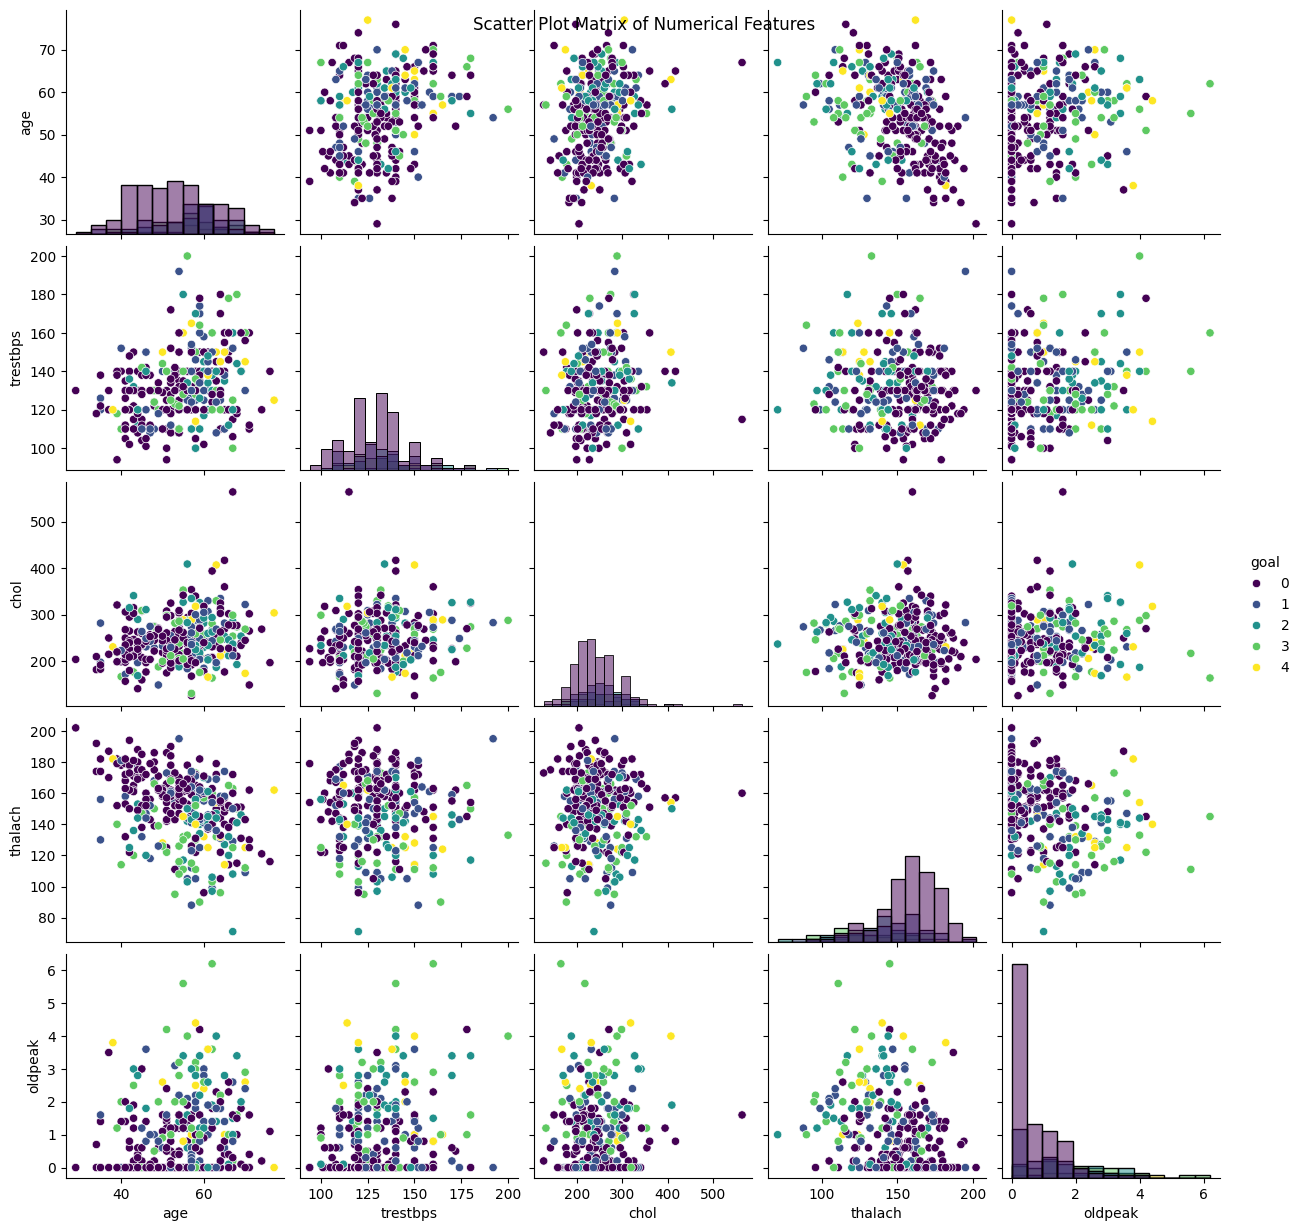

In [296]:
# 7. Systematic pairwise visualizations with pairplots
sns.pairplot(df[numerical_cols + ['goal']], hue='goal', diag_kind='hist', palette='viridis')
plt.suptitle("Scatter Plot Matrix of Numerical Features")
plt.show()

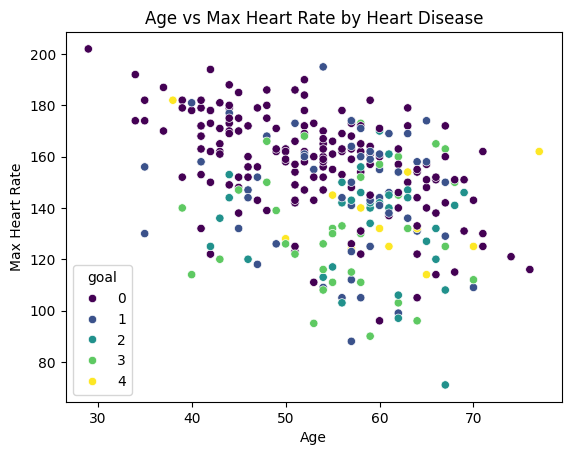

In [297]:
# 7. Understanding relationships between variables
sns.scatterplot(x='age', y='thalach', hue='goal', data=df, palette='viridis')
plt.title('Age vs Max Heart Rate by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

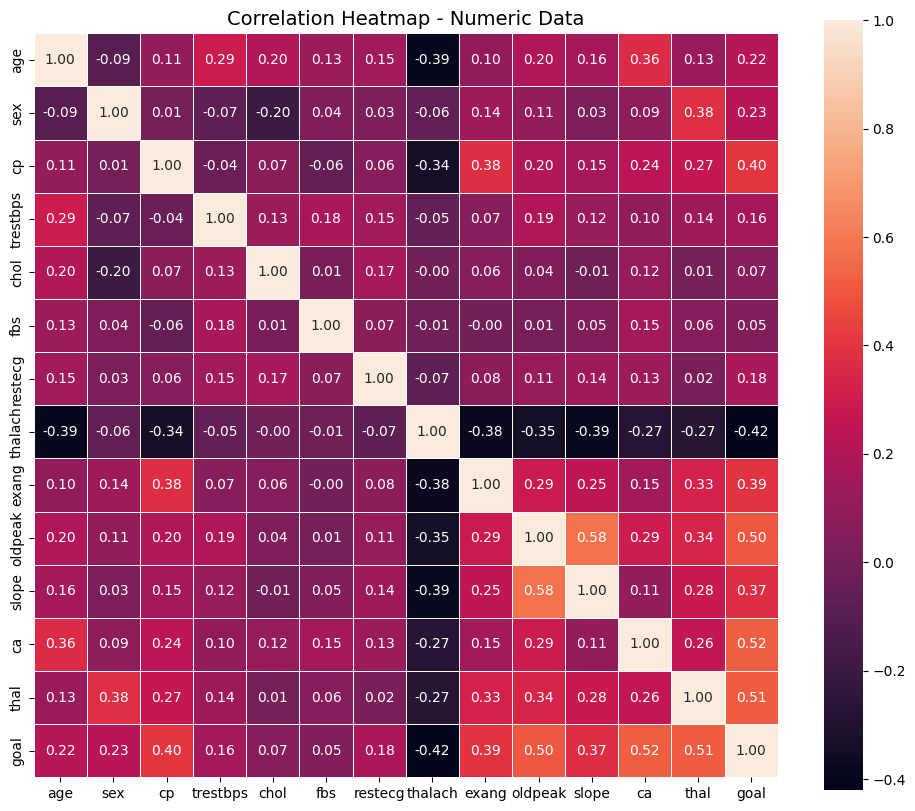

In [298]:
# 7. Summarize (linear or monotonic) relationships by computing correlations
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap - Numeric Data", fontsize=14)
plt.show()


In [299]:
# TASK 2

from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

feature_names = [col for col in df.columns if col != 'goal']
X = df[feature_names]
y = df['goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy of Logistic regression classifier on training set: 0.63
Accuracy of Logistic regression classifier on test set: 0.62
Sensitivity of Logistic regression classifier on test set: 0.26
Specificity of Logistic regression classifier on test set: 0.87


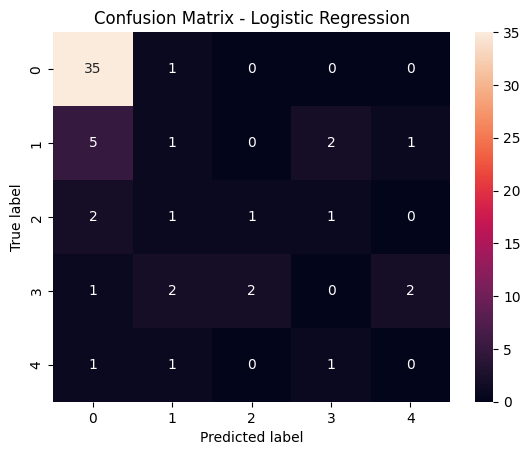

In [300]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=100, random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

accuracy_training_logreg = logreg.score(X_train, y_train)
accuracy_test_logreg = logreg.score(X_test, y_test)
sensitivity_per_class = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis=1)
sensitivity_logreg = np.mean(sensitivity_per_class)

specificity_per_class = []
for i in range(len(cnf_matrix)):
    # true Negatives are all cells not in row i or column i
    tn = np.sum(np.delete(np.delete(cnf_matrix, i, axis=0), i, axis=1))
    # false Positives are all cells in column i except the diagonal one
    fp = np.sum(cnf_matrix[:, i]) - cnf_matrix[i, i]
    specificity_per_class.append(tn / (tn + fp))
specificity_logreg = np.mean(specificity_per_class)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(accuracy_training_logreg))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(accuracy_test_logreg))
print('Sensitivity of Logistic regression classifier on test set: {:.2f}'.format(sensitivity_logreg))
print('Specificity of Logistic regression classifier on test set: {:.2f}'.format(specificity_logreg))

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Accuracy of KNN classifier on training set: 0.66
Accuracy of KNN classifier on test set: 0.63
Sensitivity of KNN classifier on test set: 0.30
Specificity of KNN classifier on test set: 0.88


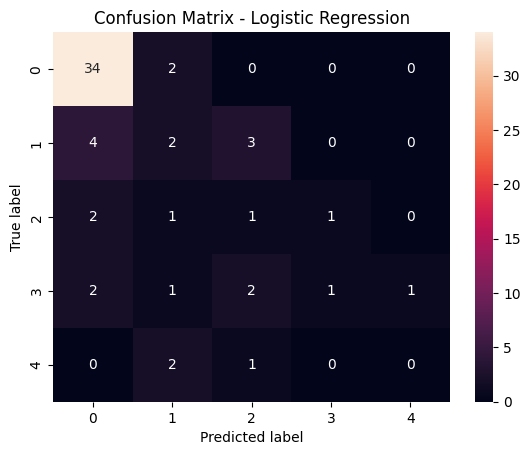

In [301]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

accuracy_training_knn = knn.score(X_train, y_train)
accuracy_test_knn = knn.score(X_test, y_test)
sensitivity_per_class = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis=1)
sensitivity_knn = np.mean(sensitivity_per_class)

specificity_per_class = []
for i in range(len(cnf_matrix)):
    # true Negatives are all cells not in row i or column i
    tn = np.sum(np.delete(np.delete(cnf_matrix, i, axis=0), i, axis=1))
    # false Positives are all cells in column i except the diagonal one
    fp = np.sum(cnf_matrix[:, i]) - cnf_matrix[i, i]
    specificity_per_class.append(tn / (tn + fp))
specificity_knn = np.mean(specificity_per_class)

print('Accuracy of KNN classifier on training set: {:.2f}'.format(accuracy_training_knn))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(accuracy_test_knn))
print('Sensitivity of KNN classifier on test set: {:.2f}'.format(sensitivity_knn))
print('Specificity of KNN classifier on test set: {:.2f}'.format(specificity_knn))

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Accuracy of SVM classifier on training set: 0.66
Accuracy of SVM classifier on test set: 0.62
Sensitivity of SVM classifier on test set: 0.27
Specificity of SVM classifier on test set: 0.86


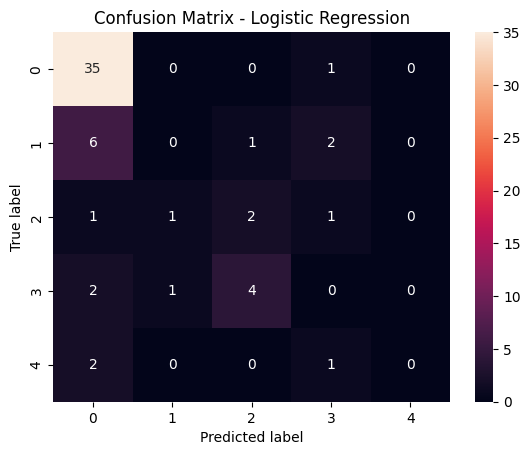

In [302]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

accuracy_training_svm = svm.score(X_train, y_train)
accuracy_test_svm = svm.score(X_test, y_test)
sensitivity_per_class = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis=1)
sensitivity_svm = np.mean(sensitivity_per_class)

specificity_per_class = []
for i in range(len(cnf_matrix)):
    # true Negatives are all cells not in row i or column i
    tn = np.sum(np.delete(np.delete(cnf_matrix, i, axis=0), i, axis=1))
    # false Positives are all cells in column i except the diagonal one
    fp = np.sum(cnf_matrix[:, i]) - cnf_matrix[i, i]
    specificity_per_class.append(tn / (tn + fp))
specificity_svm = np.mean(specificity_per_class)

print('Accuracy of SVM classifier on training set: {:.2f}'.format(accuracy_training_svm))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(accuracy_test_svm))
print('Sensitivity of SVM classifier on test set: {:.2f}'.format(sensitivity_svm))
print('Specificity of SVM classifier on test set: {:.2f}'.format(specificity_svm))

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

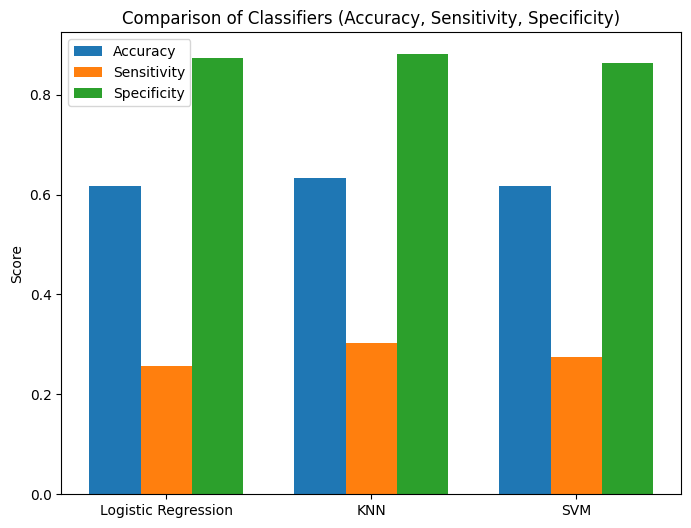

In [303]:
metrics = ['Accuracy', 'Sensitivity', 'Specificity']
classifiers = ['Logistic Regression', 'KNN', 'SVM']
values = [
    [accuracy_test_logreg, sensitivity_logreg, specificity_logreg],
    [accuracy_test_knn, sensitivity_knn, specificity_knn],
    [accuracy_test_svm, sensitivity_svm, specificity_svm]
]
results_df = pd.DataFrame(values, columns=metrics, index=classifiers)

bar_width = 0.25
x = np.arange(len(classifiers))

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width, results_df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x, results_df['Sensitivity'], width=bar_width, label='Sensitivity')
plt.bar(x + bar_width, results_df['Specificity'], width=bar_width, label='Specificity')

plt.xticks(x, classifiers)
plt.ylabel('Score')
plt.title('Comparison of Classifiers (Accuracy, Sensitivity, Specificity)')
plt.legend()
plt.show()

In [304]:
# TASK 3

df['goal'] = (df['goal'] > 0).astype(int) # make our goal binary originally 0 healthy 1-4 for diseased

feature_names = [col for col in df.columns if col != 'goal']
X = df[feature_names]
y = df['goal']

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.90
Sensitivity of Logistic regression classifier on test set: 0.89
Specificity of Logistic regression classifier on test set: 0.92


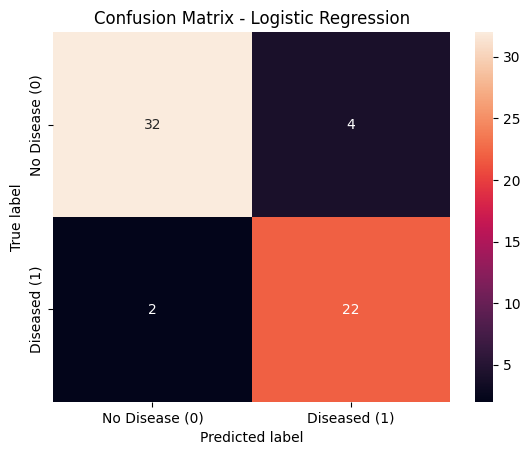

In [305]:
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_logreg = scaler.fit_transform(X_train_logreg)
X_test_logreg = scaler.transform(X_test_logreg)

logreg = LogisticRegression(max_iter=100, random_state=16)
logreg.fit(X_train_logreg, y_train_logreg)

y_pred_logreg = logreg.predict(X_test_logreg)

cnf_matrix = confusion_matrix(y_test_logreg, y_pred_logreg)

accuracy_training_logreg = logreg.score(X_train_logreg, y_train_logreg)
accuracy_test_logreg = logreg.score(X_test_logreg, y_test_logreg)
sensitivity_logreg = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
specificity_logreg = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(accuracy_training_logreg))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(accuracy_test_logreg))
print('Sensitivity of Logistic regression classifier on test set: {:.2f}'.format(sensitivity_logreg))
print('Specificity of Logistic regression classifier on test set: {:.2f}'.format(specificity_logreg))

sns.heatmap(cnf_matrix, annot=True, xticklabels=['No Disease (0)', 'Diseased (1)'], yticklabels=['No Disease (0)', 'Diseased (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Accuracy of KNN classifier on training set: 0.85
Accuracy of KNN classifier on test set: 0.83
Sensitivity of KNN classifier on test set: 0.89
Specificity of KNN classifier on test set: 0.75


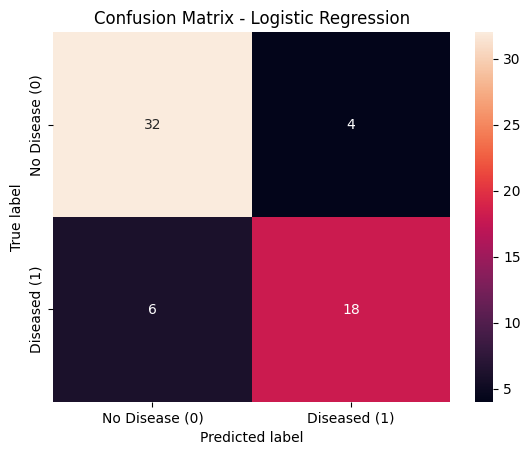

In [306]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)

y_pred = knn.predict(X_test_knn)

cnf_matrix = confusion_matrix(y_test_knn, y_pred)

accuracy_training_knn = knn.score(X_train_knn, y_train_knn)
accuracy_test_knn = knn.score(X_test_knn, y_test_knn)
sensitivity_knn = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
specificity_knn = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])

print('Accuracy of KNN classifier on training set: {:.2f}'.format(accuracy_training_knn))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(accuracy_test_knn))
print('Sensitivity of KNN classifier on test set: {:.2f}'.format(sensitivity_knn))
print('Specificity of KNN classifier on test set: {:.2f}'.format(specificity_knn))

sns.heatmap(cnf_matrix, annot=True, xticklabels=['No Disease (0)', 'Diseased (1)'], yticklabels=['No Disease (0)', 'Diseased (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Accuracy of SVM classifier on training set: 0.84
Accuracy of SVM classifier on test set: 0.90
Sensitivity of SVM classifier on test set: 0.92
Specificity of SVM classifier on test set: 0.88


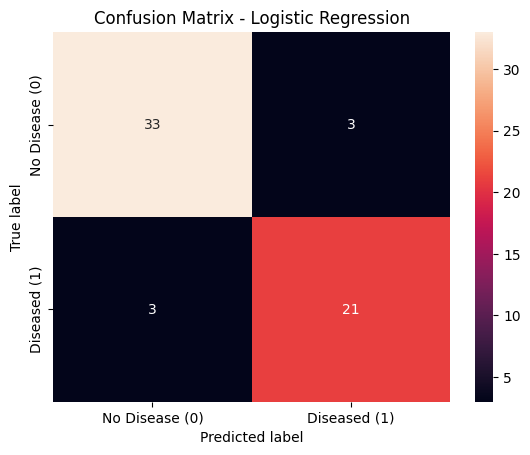

In [307]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_svm, y_train_svm)

y_pred = svm.predict(X_test_svm)

cnf_matrix = confusion_matrix(y_test_svm, y_pred)

accuracy_training_svm = svm.score(X_train_svm, y_train_svm)
accuracy_test_svm = svm.score(X_test_svm, y_test_svm)
sensitivity_svm = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
specificity_svm = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])

print('Accuracy of SVM classifier on training set: {:.2f}'.format(accuracy_training_svm))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(accuracy_test_svm))
print('Sensitivity of SVM classifier on test set: {:.2f}'.format(sensitivity_svm))
print('Specificity of SVM classifier on test set: {:.2f}'.format(specificity_svm))

sns.heatmap(cnf_matrix, annot=True, xticklabels=['No Disease (0)', 'Diseased (1)'], yticklabels=['No Disease (0)', 'Diseased (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

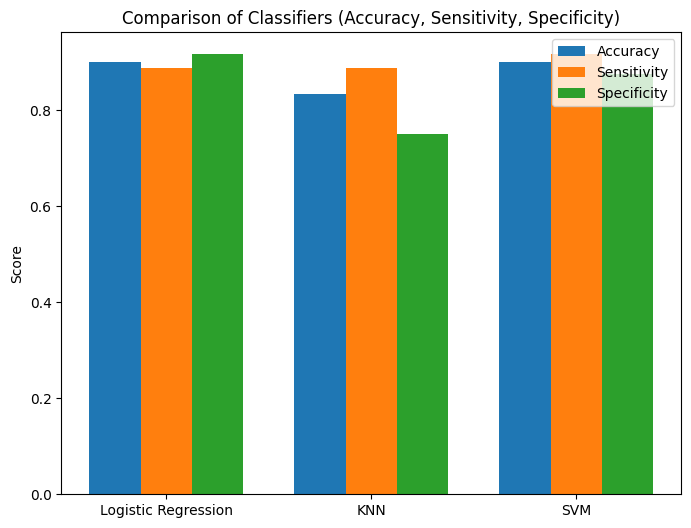

In [308]:
metrics = ['Accuracy', 'Sensitivity', 'Specificity']
classifiers = ['Logistic Regression', 'KNN', 'SVM']
values = [
    [accuracy_test_logreg, sensitivity_logreg, specificity_logreg],
    [accuracy_test_knn, sensitivity_knn, specificity_knn],
    [accuracy_test_svm, sensitivity_svm, specificity_svm]
]
results_df = pd.DataFrame(values, columns=metrics, index=classifiers)

bar_width = 0.25
x = np.arange(len(classifiers))

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width, results_df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x, results_df['Sensitivity'], width=bar_width, label='Sensitivity')
plt.bar(x + bar_width, results_df['Specificity'], width=bar_width, label='Specificity')

plt.xticks(x, classifiers)
plt.ylabel('Score')
plt.title('Comparison of Classifiers (Accuracy, Sensitivity, Specificity)')
plt.legend()
plt.show()

The classifications made with the first set of the data with 1-4 being equal to haveing no disease were not making very good predictions. with that classifaction spread about amoung 4 different points there wasn't enough data in any of the 4 for the classifiers to train on. When combining all the no disease outputs into one the classifiers are about to produce more acurate and usable results. 

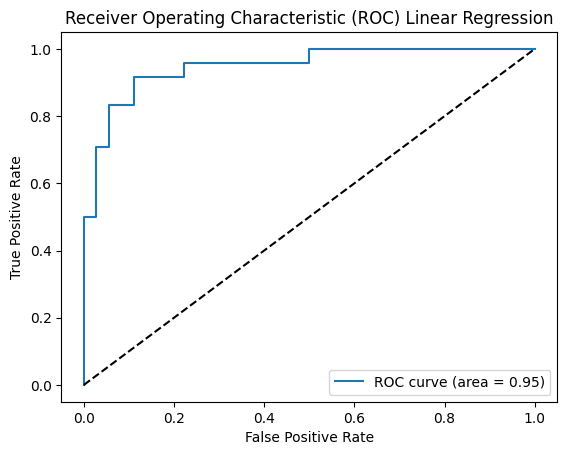

In [309]:
# TASK 4

from sklearn.metrics import roc_curve, auc

y_score_logreg = logreg.decision_function(X_test_logreg)
fpr, tpr, _ = roc_curve(y_test_logreg, y_score_logreg)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Linear Regression')
plt.legend()
plt.show()

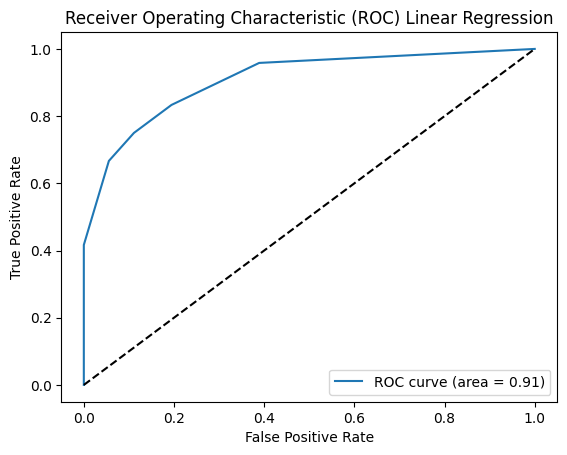

In [310]:
y_score_knn = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_knn, y_score_knn)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Linear Regression')
plt.legend()
plt.show()

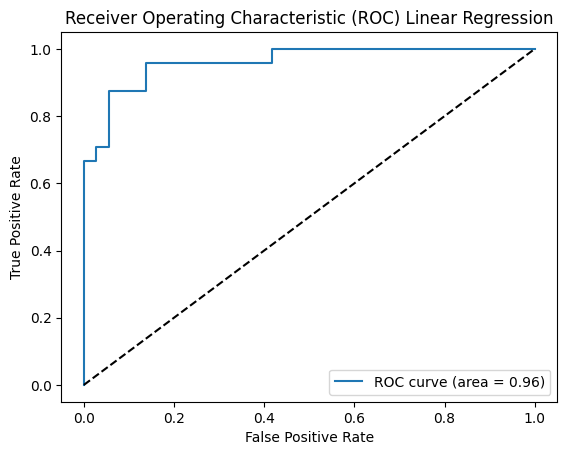

In [311]:
y_score_svm = svm.decision_function(X_test_svm)
fpr, tpr, _ = roc_curve(y_test_svm, y_score_svm)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Linear Regression')
plt.legend()
plt.show()